In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# In addition to the online example, these packages below help dealinf with the file system
import glob
import os


Python: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


scipy: 0.19.1
numpy: 1.12.1


matplotlib: 2.0.2


pandas: 0.20.3


sklearn: 0.18.1


In [4]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [9]:
# Set the directory to parse, and the column names
#dir = r'C:/Users/AdamShelboourne/Uni/Physics/Astr310/Python/mu/daily/*'
dir = r'C:\Users\Adam Shelbourne\Uni\Physics\Astr310\Python\mu\daily\*'
#dir = r'C:\Users\Adam Shelbourne\Uni\Physics\Astr310\Python\sso\daily\*'

# Set the column names for the data
names = ['UTCDateTime', 'LocalDateTime', 'Temperature', 'Counts', 'Frequency', 'MSAS']
#print(glob.glob(dir))
#print (glob.glob(dir2))

In [10]:
# Set the common time grid onto which each night is sampled. The common grid 
# is defined by the start time defined below, and the number of hours from that time
beginh = 16 # Hour of start time (hour)
beginm = 30 # Hour of start time (minute)
nhrs = 15   # Number of hours to extend time grid

# Output file name for storing the big 2D array of resampled SQM values. Remove the file
# if it already exists.
outfile = dir + 'all_data.dat'
datesOutfile = dir + 'dates.dat'
os.remove(outfile) if os.path.exists(outfile) else None
os.remove(datesOutfile) if os.path.exists(datesOutfile) else None
print (glob.glob(outfile))
print (glob.glob(datesOutfile))


['C:\\Users\\Adam Shelbourne\\Uni\\Physics\\Astr310\\Python\\mu\\daily\\all_data.dat']


['C:\\Users\\Adam Shelbourne\\Uni\\Physics\\Astr310\\Python\\mu\\daily\\dates.dat']


In [11]:
# Open up files for the outputs. There is one for the SQM float values, and another for
# storing the data of each night. These are merged later, but couldn't easily see how to
# do this directly in one file, due to mixed data types.
outfile = r'C:\\Users\\Adam Shelbourne\\Uni\\Physics\\Astr310\\Python\\mu\\daily\\all_data.dat'
dates = r'C:\\Users\\Adam Shelbourne\\Uni\\Physics\\Astr310\\Python\\mu\\daily\\dates.dat'
f=open(outfile,'a+b')
f2=open(dates,'w')

# Parse the data directory and pick up all the relevant data file names. Note that the directory
# listing will set the order of the files. The default pysqm.py output files are dated, so this should
# be OK.
for name in glob.glob(dir+'20*.dat'):
# Read in the data set
    dataset = pandas.read_csv(name,comment="#",sep=';',names=names)
#Establish Local Time as index
    times = pandas.to_datetime(dataset['LocalDateTime'])
    dataset.index=times
# Set up the common time span, but adapted for the current data's date
    rng = pandas.date_range(pandas.to_datetime(dataset['LocalDateTime']).dt.date[0] + pandas.DateOffset(hours=beginh,minutes=beginm), periods=nhrs*60, freq='T')
# Set the new time grid as the index
    d = {'Date' : pandas.Series(rng)}
    df = pandas.DataFrame(d)
    dates = pandas.to_datetime(df['Date'])
    df.index = dates
# Resample the original data to minutes, spanning the common grid
    start = dates.min().strftime('%H:%M:%S')
    end = dates.max().strftime('%H:%M:%S')
    sub = dataset.between_time(start_time=start,end_time=end,include_start=True,include_end=True).resample('T').mean().interpolate(method='linear')
# Combine data with this grid, thus putting it on the common frame
    comb = df.join(sub['MSAS'])
# Save data as new line in output file
    numpy.savetxt(f,[numpy.array(comb['MSAS'])[0:(nhrs*60)-1]])
    f2.write(str(pandas.to_datetime(dataset['LocalDateTime']).dt.date[0])+'\n')

# Close the files
f.close()
f2.close()

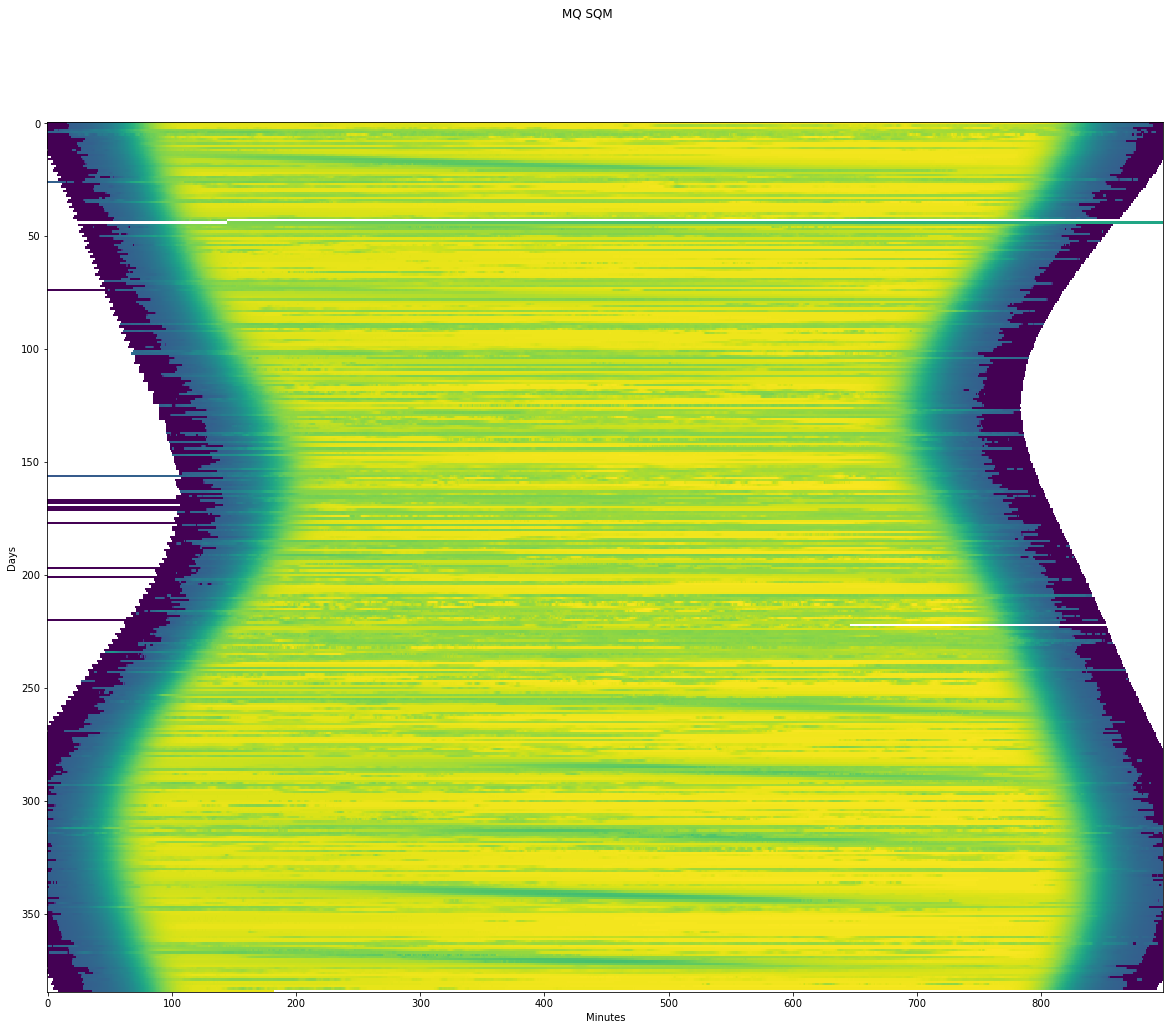

In [66]:
dataset2 = pandas.read_table(outfile, delim_whitespace=True, header=None, skip_blank_lines=True)
#dataset2.shape
#dataset2[200:240].T.plot(alpha=0.5,legend=False)
#dataset2.T.plot(alpha=0.1,legend=False)
plt.rcParams['figure.figsize'] = (20, 16)
plt.imshow(dataset2,aspect='auto')
plt.suptitle('MQ SQM')
plt.xlabel('Minutes')
plt.ylabel('Days')
#plt.savefig(dir+'all.png')
plt.show()
#dataset2.plot.hexbin(gridsize=25)

NameError: name 'dir2' is not defined